<a href="https://colab.research.google.com/github/ErikFantomex/TDA/blob/main/TesisV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo 
Preprocesamiento: Visualizacion  de la serie de tiempo univariada

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from gtda.time_series import SlidingWindow
from gtda.diagrams import Amplitude
from gtda.time_series import PearsonDissimilarity
from gtda.time_series import TakensEmbedding
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
from gtda.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#!python -m pip install -U giotto-tda-nightly


In [ ]:
#!python -m pip install -U giotto-tda-nightly


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/datasets/Ts_ETH.csv'
df=pd.read_csv(path)
df.head()
df.describe()
df.info
df.columns
df= df[['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Close Time', 'Quote Asset Volume', 'Number of Trades',
       'TB Base Volume', 'TB Quote Volume']]

In [ ]:
#Dataframe con solo lo que nos importa 
df.head()
uni_df = df['Close'].values
len(uni_df)


In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
df.plot(subplots=True)

#Prerare data 
simple moving average (SMA) 

In [ ]:
def prepare_data(dataset,start_index,end_index,window_size):
    labels=[]
    features=[]
    for i in range(start_index,end_index-window_size):
        l=range(i,i+window_size)
        features.append(dataset[l])
        labels.append(dataset[l[-1]+1])
        
    return np.array(features),np.array(labels)  

In [ ]:
#Tamaño de ventana para analizar 

x_train,y_train=prepare_data(uni_df,0,325,5)
x_test,y_test=prepare_data(uni_df,325,424,5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 5)
(320,)
(94, 5)
(94,)


In [ ]:
x_train

array([[0.064114, 0.066593, 0.065666, 0.068589, 0.069182],
       [0.066593, 0.065666, 0.068589, 0.069182, 0.067498],
       [0.065666, 0.068589, 0.069182, 0.067498, 0.070902],
       ...,
       [0.054571, 0.054807, 0.052371, 0.053097, 0.052445],
       [0.054807, 0.052371, 0.053097, 0.052445, 0.054849],
       [0.052371, 0.053097, 0.052445, 0.054849, 0.054833]])

Text(0, 0.5, 'closing price values')

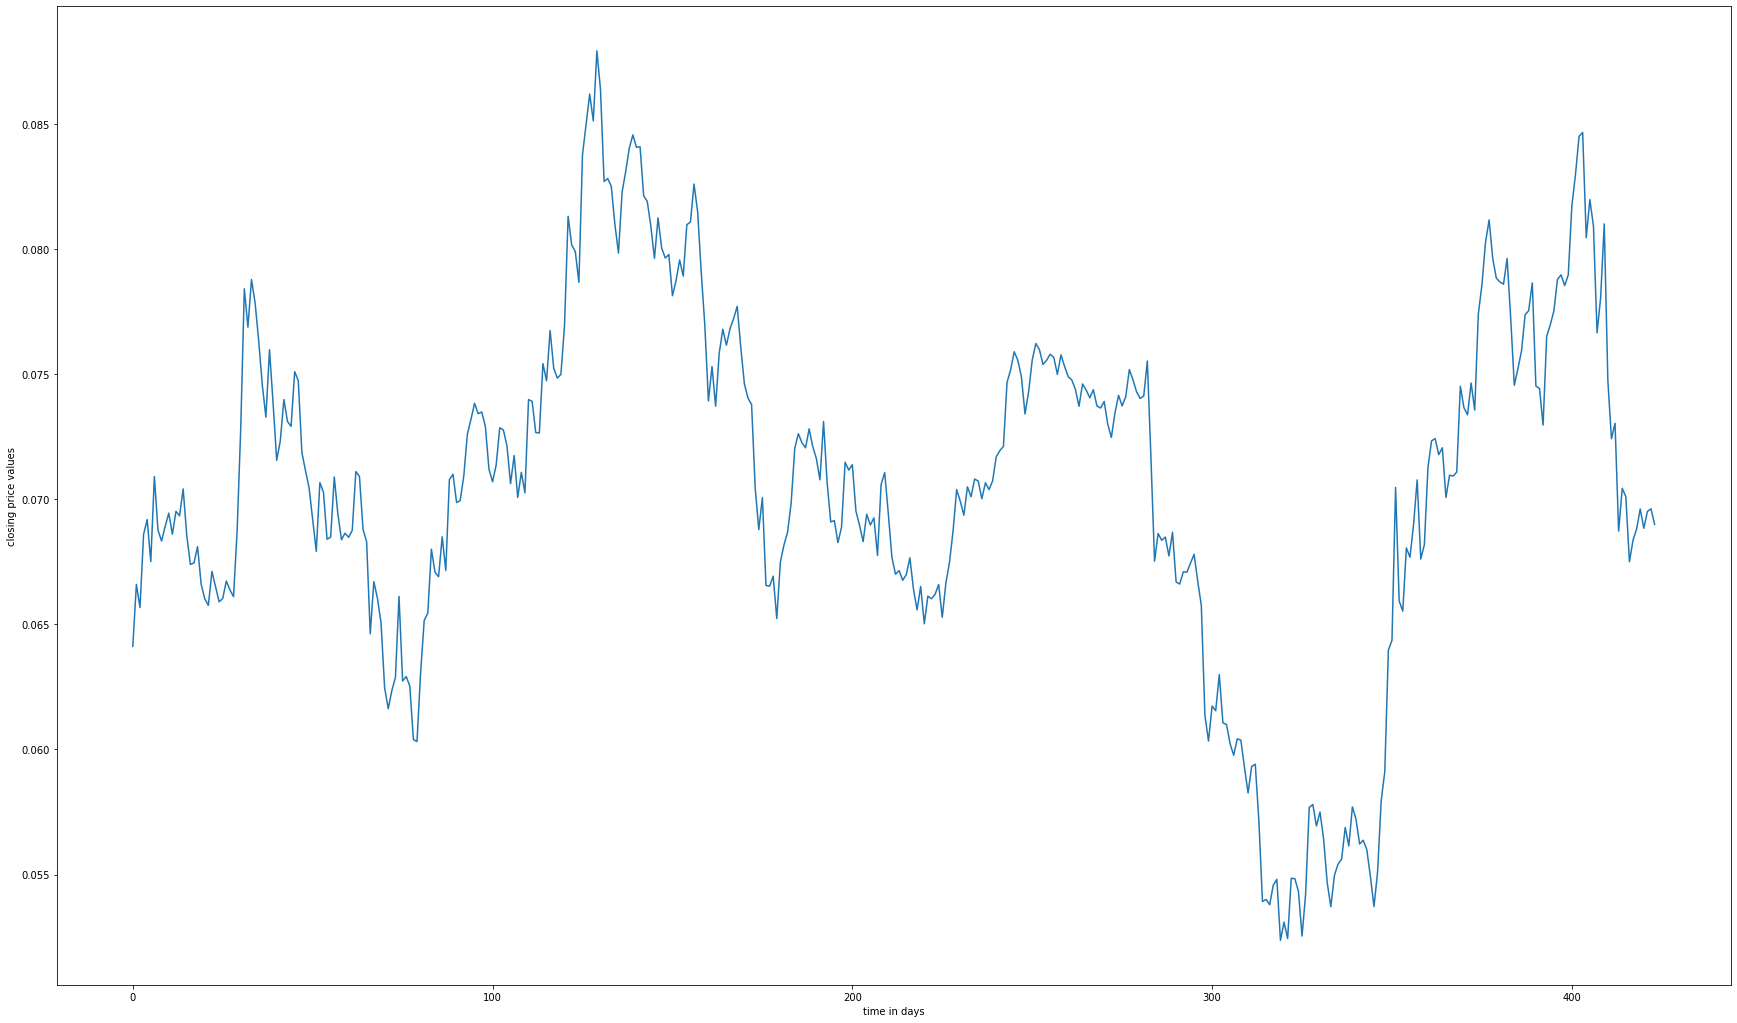

In [ ]:
fig,ax=plt.subplots(figsize=(30,18))
ax.plot(uni_df)
plt.xlabel('time in days')
plt.ylabel('closing price values')

In [ ]:
def moving_averages_model(input_data):
    return np.mean(input_data)

In [ ]:
y_pred=[]

for i in range(len(x_train)):
    y_pred.append(moving_averages_model(x_train[i]))


In [ ]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(y_train,np.array(y_pred))

In [ ]:
window=[3,4,5,6,7,8,9,10]
train_loss=[]
test_loss=[]
for i in window:
    x_train,y_train=prepare_data(uni_df,0,325,i)
    x_test,y_test=prepare_data(uni_df,325,424,i)
    y_train_pred=[]
    y_test_pred=[]
    for j in range(len(x_train)):
        y_train_pred.append(moving_averages_model(x_train[j]))
    for j in range(len(x_test)):
        y_test_pred.append(moving_averages_model(x_test[j]))
    train_loss.append(mean_squared_error(y_train,np.array(y_train_pred)))
    test_loss.append(mean_squared_error(y_test,np.array(y_test_pred)))

Text(0, 0.5, 'losses')

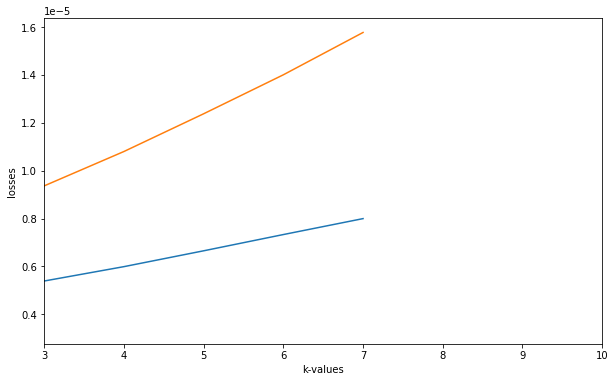

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]

plt.plot(train_loss)
plt.plot(test_loss)
plt.xlim(3,10)
plt.xlabel('k-values')
plt.ylabel('losses')


In [ ]:


x_train,y_train=prepare_data(uni_df,0,325,3)
x_test,y_test=prepare_data(uni_df,325,424,3)

y_test_pred=[]

for i in range(len(x_test)):
   y_test_pred.append(moving_averages_model(x_test[i]))



Text(0.5, 1.0, 'predictions')

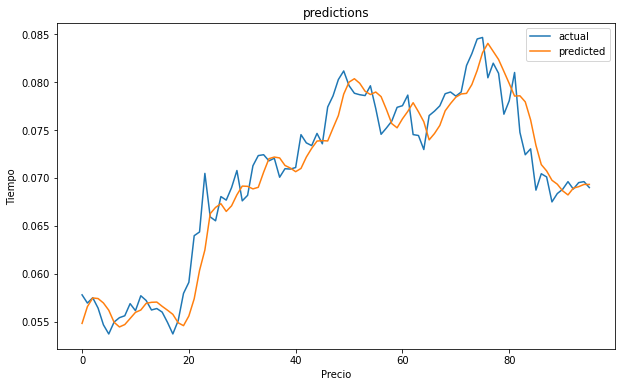

In [ ]:


plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('Precio')
plt.ylabel('Tiempo')
plt.legend()
plt.title('predictions')



#Weighted Moving Averages Model:


In [ ]:
def weighted_ma_model(x,n):
    w=np.array(range(1,n+1))
    y_pred=np.dot(w,x)/np.sum(w)
    return y_pred

In [ ]:
x_train,y_train=prepare_data(uni_df,0,325,5)
x_test,y_test=prepare_data(uni_df,325,424,5)

In [ ]:


window=[3,4,5,6,7,8,9,10]
train_loss=[]
test_loss=[]
for i in window:
    x_train,y_train=prepare_data(uni_df,0,325,i)
    x_test,y_test=prepare_data(uni_df,325,424,i)
    y_train_pred=[]
    y_test_pred=[]
    for j in range(len(x_train)):
        y_train_pred.append(weighted_ma_model(x_train[j],i))
    for j in range(len(x_test)):
        y_test_pred.append(weighted_ma_model(x_test[j],i))
    train_loss.append(mean_squared_error(y_train,np.array(y_train_pred)))
    test_loss.append(mean_squared_error(y_test,np.array(y_test_pred)))
    



Text(0, 0.5, 'losses')

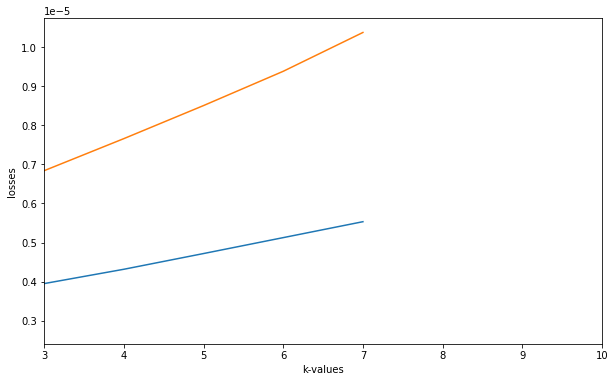

In [ ]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlim(3,10)
plt.xlabel('k-values')
plt.ylabel('losses')

In [ ]:
x_train,y_train=prepare_data(uni_df,0,325,3)
x_test,y_test=prepare_data(uni_df,325,424,3)

y_test_pred=[]

for i in range(len(x_test)):
      y_test_pred.append(weighted_ma_model(x_test[i],3))


Text(0.5, 1.0, 'predictions')

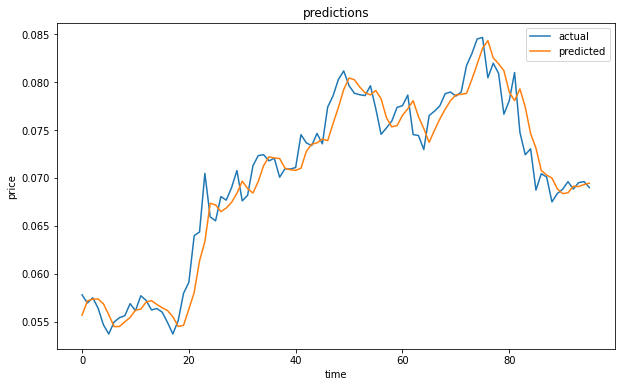

In [ ]:
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')

# Modelo Arima prediccion de series de tiempo

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(uni_df[:325], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  324
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1650.070
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 10 Nov 2022   AIC                          -3286.140
Time:                        01:06:13   BIC                          -3259.675
Sample:                             1   HQIC                         -3275.577
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.061e-05   7.94e-05     -0.386      0.700      -0.000       0.000
ar.L1.D.y     -0.0093      0.056     -0.166      0.868      -0.118       0.100
ar.L2.D.y     -0.0140      0.056     -0.252      0.8

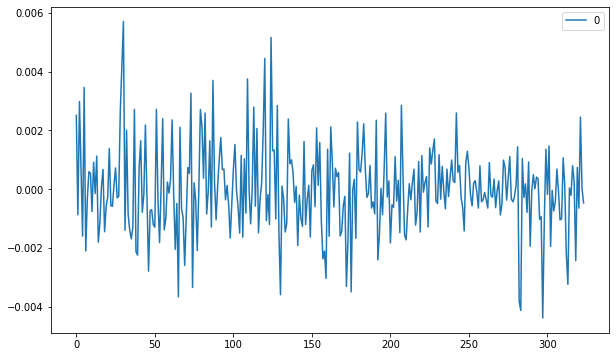

In [ ]:


residuals = pd.DataFrame(model_fit.resid)
residuals.plot()



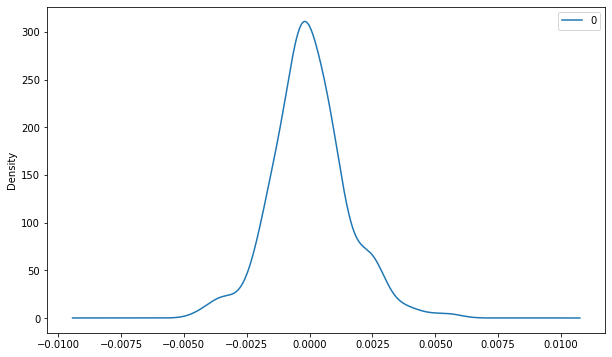

In [ ]:
residuals.plot(kind='kde')

In [ ]:
from tqdm import tqdm

history = list(uni_df[:325])
y_test_pred = list()
for t in tqdm(range(325,len(uni_df))):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    y_test_pred.append(yhat)
    obs = uni_df[t]
    history.append(obs)

  0%|          | 0/99 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
100%|██████████| 99/99 [00:55<00:00,  1.77it/s]


Text(0.5, 1.0, 'predictions')

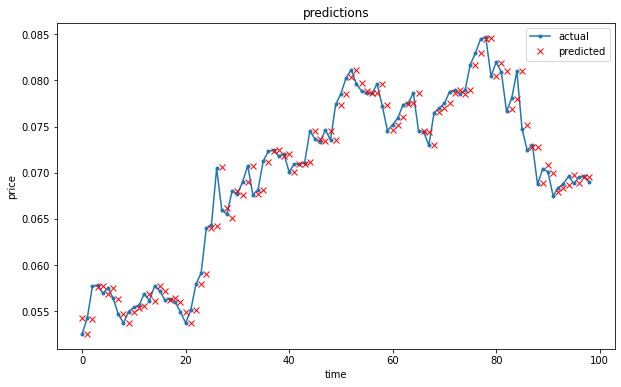

In [ ]:


plt.plot(uni_df[325:],'.-',label='actual')
plt.plot(y_test_pred,'rx',label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')



#Univariate time-series forecasting:LSTM'S


In [ ]:
x_train,y_train=prepare_data(uni_df,0,325,10)
x_test,y_test=prepare_data(uni_df,325,424,10)



x_train_mean=np.mean(x_train,axis=0)
x_train_std=np.std(x_train,axis=0)
x_train = (x_train-x_train_mean)/x_train_std
x_test = (x_test-x_train_mean)/x_train_std


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(315, 10)
(315,)
(89, 10)
(89,)


#Arquitectura del modelo

In [ ]:
from tensorflow.keras.layers import Dense,LSTM,Input

from tensorflow.keras.models import Model

input1=Input(shape=(10,1))

x=LSTM(8,activation='relu')(input1) 


x=Dense(16,activation='relu')(x)
x=Dense(1)(x)

model=Model(inputs=input1,outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='mae')
model.fit(x_train,y_train,batch_size=8, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
40/40 [==============================] - 2s 16ms/step - loss: 0.0139 - val_loss: 0.0101
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.0071
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0059
Epoch 4/10
40/40 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss: 0.0066
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0086
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 7/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0086
Epoch 8/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0041
Epoch 9/10
40/40 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 10/10
40/40 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0042


#Predicciones y resultados

3/3 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'predictions')

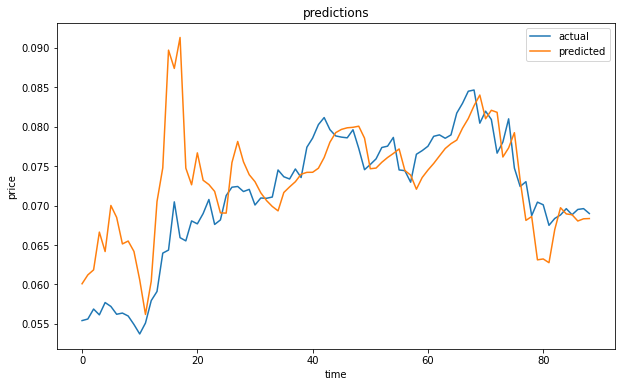

In [ ]:
y_test_pred=model.predict(x_test)
plt.plot(y_test,label='actual')
plt.plot(y_test_pred,label='predicted')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title('predictions')

# Prediccion serie de tiempo  Version 2




In [ ]:
#Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
import math

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
%matplotlib inline

In [ ]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
0,2021-08-01 00:00:00.000000000,0.061040,0.065053,0.061035,0.064114,164902.6180,2021-08-01 23:59:59.999000064,10348.438893,253217,81577.3440,5123.028724
1,2021-08-02 00:00:00.000000000,0.064121,0.067050,0.063557,0.066593,138994.7850,2021-08-02 23:59:59.999000064,9119.996160,219190,67830.6450,4451.650450
2,2021-08-03 00:00:00.000000000,0.066595,0.066733,0.063829,0.065666,150450.4330,2021-08-03 23:59:59.999000064,9805.611653,238367,74624.4690,4859.943471
3,2021-08-04 00:00:00.000000000,0.065669,0.069349,0.065235,0.068589,152456.2120,2021-08-04 23:59:59.999000064,10226.749355,252138,78196.3800,5245.714307
4,2021-08-05 00:00:00.000000000,0.068588,0.073242,0.067133,0.069182,255311.1790,2021-08-05 23:59:59.999000064,17762.226079,387318,129694.0020,9027.292901
...,...,...,...,...,...,...,...,...,...,...,...
419,2022-09-24 00:00:00.000000000,0.068808,0.070522,0.068583,0.069605,65955.6931,2022-09-24 23:59:59.999000064,4595.814120,224423,34096.2538,2376.322591
420,2022-09-25 00:00:00.000000000,0.069606,0.069885,0.067897,0.068834,71336.0817,2022-09-25 23:59:59.999000064,4926.141569,222221,36330.6950,2507.861468
421,2022-09-26 00:00:00.000000000,0.068833,0.069667,0.068226,0.069505,86355.0883,2022-09-26 23:59:59.999000064,5961.683585,275490,42083.6472,2905.894469
422,2022-09-27 00:00:00.000000000,0.069503,0.069972,0.068201,0.069609,129718.0894,2022-09-27 23:59:59.999000064,8948.288624,356483,64145.8908,4425.941943


In [ ]:

#Asignando estampas de tiempo 

# Importing Training Set
dataset_train = df
# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:6]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Open Time'])

datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f000').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))



Training set shape == (424, 11)
All timestamps == 424
Featured selected: ['Open', 'High', 'Low', 'Close', 'Volume']


In [ ]:
test=dataset_train.iloc[325:]['Open']
print(test)



325    0.054327
326    0.052540
327    0.054229
328    0.057686
329    0.057797
         ...   
419    0.068808
420    0.069606
421    0.068833
422    0.069503
423    0.069610
Name: Open, Length: 99, dtype: float64


In [ ]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set



Shape of training set == (424, 5).


array([[6.10400000e-02, 6.50530000e-02, 6.10350000e-02, 6.41140000e-02,
        1.64902618e+05],
       [6.41210000e-02, 6.70500000e-02, 6.35570000e-02, 6.65930000e-02,
        1.38994785e+05],
       [6.65950000e-02, 6.67330000e-02, 6.38290000e-02, 6.56660000e-02,
        1.50450433e+05],
       ...,
       [6.88330000e-02, 6.96670000e-02, 6.82260000e-02, 6.95050000e-02,
        8.63550883e+04],
       [6.95030000e-02, 6.99720000e-02, 6.82010000e-02, 6.96090000e-02,
        1.29718089e+05],
       [6.96100000e-02, 6.98690000e-02, 6.75500000e-02, 6.89880000e-02,
        1.22364427e+05]])

In [ ]:
# Feature Scaling

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])



array([[-1.33128242],
       [-0.89964932],
       [-0.55305396],
       [-0.68278205],
       [-0.27384435],
       [-0.18992737],
       [-0.42542729],
       [ 0.05117636],
       [-0.24890742],
       [-0.30900823],
       [-0.22831344],
       [-0.1546234 ],
       [-0.27202312],
       [-0.14481674],
       [-0.17045415],
       [-0.0191514 ],
       [-0.27860759],
       [-0.44153823],
       [-0.43439338],
       [-0.34319145],
       [-0.55263367],
       [-0.63388885],
       [-0.67059377],
       [-0.48076487],
       [-0.56594271],
       [-0.65168093],
       [-0.63164733],
       [-0.53624254],
       [-0.5862565 ],
       [-0.62226095],
       [-0.25395085],
       [ 0.31721701],
       [ 1.10090919],
       [ 0.88670373],
       [ 1.15372506],
       [ 1.02189554],
       [ 0.80867074],
       [ 0.56154293],
       [ 0.38250135],
       [ 0.76019783],
       [ 0.45983386],
       [ 0.141958  ],
       [ 0.25039164],
       [ 0.48042785],
       [ 0.35854508],
       [ 0

In [ ]:


# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 60   # Number of days we want top predict into the future
n_past = 180     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))



X_train shape == (185, 180, 4).
y_train shape == (185, 1).


In [ ]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],4)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],4)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],4)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 180, 50)           8400      
                                                                 
 dropout (Dropout)           (None, 180, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 180, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 180, 50)           0         
                                                                 
 gru_2 (GRU)                 (None, 180, 50)           15300     
                                                                 
 dropout_2 (Dropout)         (None, 180, 50)           0         
                                                                 
 gru_3 (GRU)                 (None, 50)                1

In [ ]:
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=100, batch_size=300)


Epoch 1/100
1/1 [==============================] - 10s 10s/step - loss: 1.5127
Epoch 2/100
1/1 [==============================] - 1s 915ms/step - loss: 1.2102
Epoch 3/100
1/1 [==============================] - 1s 917ms/step - loss: 1.0011
Epoch 4/100
1/1 [==============================] - 1s 915ms/step - loss: 0.8470
Epoch 5/100
1/1 [==============================] - 1s 926ms/step - loss: 0.7802
Epoch 6/100
1/1 [==============================] - 1s 912ms/step - loss: 0.7146
Epoch 7/100
1/1 [==============================] - 1s 904ms/step - loss: 0.7422
Epoch 8/100
1/1 [==============================] - 1s 956ms/step - loss: 0.7490
Epoch 9/100
1/1 [==============================] - 1s 948ms/step - loss: 0.7433
Epoch 10/100
1/1 [==============================] - 1s 920ms/step - loss: 0.6101
Epoch 11/100
1/1 [==============================] - 1s 924ms/step - loss: 0.5666
Epoch 12/100
1/1 [==============================] - 1s 912ms/step - loss: 0.5229
Epoch 13/100
1/1 [====================

In [ ]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()
'''
Remeber, we have datelist_train from begining.
'''
# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
# Perform predictions
predictions_future = modelGRU.predict(X_train[-n_future:])
predictions_train = modelGRU.predict(X_train[n_past:])

1/1 [==============================] - 0s 229ms/step


In [ ]:


# Inverse the predictions to original measurements

# ---> Special function: convert  to 
def datetime_to_timestamp(x):

    return datetime.strptime(x.strftime('%Y-%m-%d %H:%M:%S.%f000'), '%Y-%m-%d %H:%M:%S.%f000')

y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))
# Convert  to  for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)
PREDICTION_TRAIN.head(3)

,Open
2022-09-24,0.067744
2022-09-25,0.067613
2022-09-26,0.067430


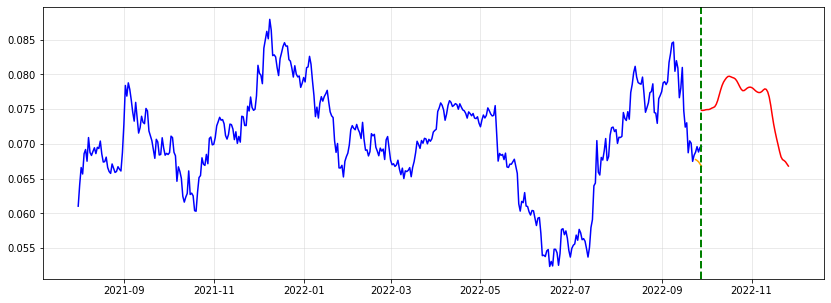

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2021-08-01'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open'], color='orange', label='Training predictions')
plt.plot(datelist_train, dataset_train['Open'], color='b', label='Actual Stock Price')
plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')
plt.grid(which='major', color='#cccccc', alpha=0.5)
plt.show()
